In [1]:
import realspace_tb as tb
import realspace_tb.orbitronics_2d as orb
import realspace_tb.backend as B
import numpy as np
import matplotlib.pyplot as plt

/Users/leonard/dev/projects/university/orbitronics_research_project/orbitronics/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
B.set_backend(precision="single")

In [3]:
!pip install -e ..

Obtaining file:///Users/leonard/dev/projects/university/orbitronics_research_project
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for realspace_tb (pyproject.toml) ... done
  Created wheel for realspace_tb: filename=realspace_tb-0.1-0.editable-py3-none-any.whl size=2685 sha256=65b4ebefc21492f64bb704b601eee8bd1ecc003d8ea4f273074ffea44badfe8d
  Stored in directory: /private/var/folders/2f/qsk40ts91rs8dfrbwykc6d080000gn/T/pip-ephem-wheel-cache-qv62lz39/wheels/11/57/f5/acfc50c5fc015fd93804c5e7df0dcf1262e2906140b1d0ecdc
Successfully built realspace_tb
  Attempting uninstall: realspace_tb
    Found existing installation: realspace_tb 0.1
    Uninstalling realspace_tb-0.1:
      Successfully uninstalled realspace_tb-0.1

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip insta

In [4]:
class MatrixElementObservable(tb.Observable):
    def __init__(
        self,
        i,
        j,
        window: tb.MeasurementWindow = tb.MeasurementWindow(),
    ) -> None:
        super().__init__(window)
        self.i = i
        self.j = j

    def _compute(self, rho: B.Array, t: float) -> B.Array:
        return B.xp().abs(rho[self.i, self.j])

class MatrixObservable(tb.Observable):
    def _compute(self, rho: B.Array, t: float) -> B.Array:
        return B.xp().abs(rho)

Calculating eigenstates at t=0...


100%|██████████| 10000/10000 [00:01<00:00, 5444.78it/s]


Calculating eigenstates at t=0...


100%|██████████| 10000/10000 [00:01<00:00, 6721.45it/s]


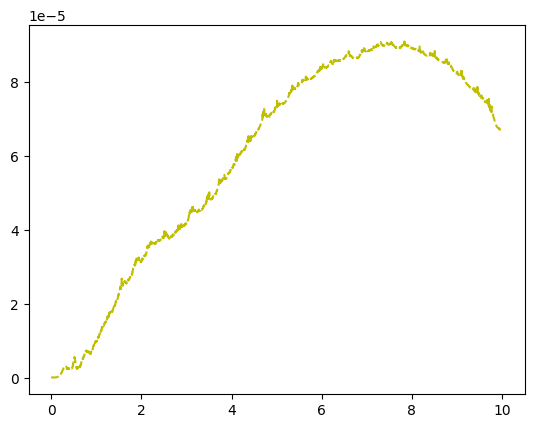

In [5]:
geometry = orb.HoneycombLatticeGeometry(Lx=5, Ly=8)
field = orb.RampedACFieldAmplitude(E0=0.1, omega=10.0, T_ramp=1, direction=np.array([0, 1]))

H = orb.LinearFieldHamiltonian(geometry, field)
H_peierls = orb.LinearFieldHamiltonianPeierls(geometry, field)
rho = H.ground_state_density_matrix(fermi_level=0.0)

# me_obs = MatrixElementObservable(1, 10)
me_obs = MatrixObservable()
me_obs2 = MatrixObservable()

tb.RK4NeumannSolver().evolve(rho, H, dt=0.001, total_time=10.0, observables=[me_obs])
# plt.plot(me_obs.measurement_times, me_obs.values)

rho2 = H_peierls.ground_state_density_matrix(fermi_level=0.0)
tb.RK4NeumannSolver().evolve(rho2, H_peierls, dt=0.001, total_time=10.0, observables=[me_obs2])

plt.plot(me_obs2.measurement_times,  np.linalg.norm(me_obs2.values - me_obs.values, axis=(1,2), ord="fro"), "y--")
# plt.ylim((None, 0))

plt.show()